In [1]:
from pathlib import Path
from tensorflow.image import crop_and_resize
from tensorflow.io import decode_png, read_file

generator_glob = Path().glob('datasets/*.png')
list_png = [
    crop_and_resize((decode_png(read_file(str(path)), 1),), ((.21, .48, .85, .71),), (0,), (300, 300))[0]
    for path in generator_glob
]
list_png[:2]

2025-09-16 05:56:14.085359: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758002174.273337      28 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758002174.335971      28 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758002174.883654      28 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758002174.883689      28 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758002174.883691      28 computation_placer.cc:177] computation placer alr

[<tf.Tensor: shape=(300, 300, 1), dtype=float32, numpy=
 array([[[159.      ],
         [159.      ],
         [159.      ],
         ...,
         [195.      ],
         [194.41249 ],
         [194.7909  ]],
 
        [[159.      ],
         [159.      ],
         [159.      ],
         ...,
         [195.      ],
         [195.      ],
         [194.55922 ]],
 
        [[159.      ],
         [159.      ],
         [159.      ],
         ...,
         [194.4624  ],
         [194.79088 ],
         [194.40335 ]],
 
        ...,
 
        [[123.46718 ],
         [123.316475],
         [123.43519 ],
         ...,
         [155.      ],
         [155.      ],
         [155.      ]],
 
        [[123.01914 ],
         [123.06444 ],
         [123.77966 ],
         ...,
         [155.      ],
         [155.      ],
         [155.      ]],
 
        [[123.      ],
         [123.      ],
         [123.      ],
         ...,
         [155.      ],
         [155.      ],
         [155.      ]]], 

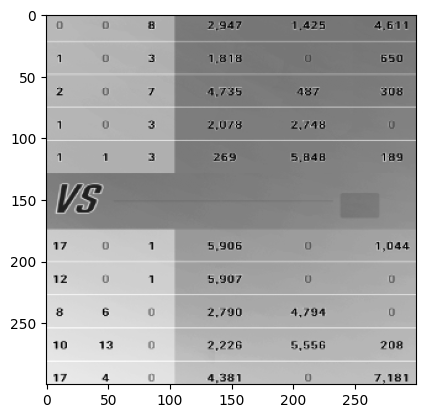

In [2]:
from matplotlib.pyplot import imshow, show

imshow(list_png[0], 'Greys')
show()

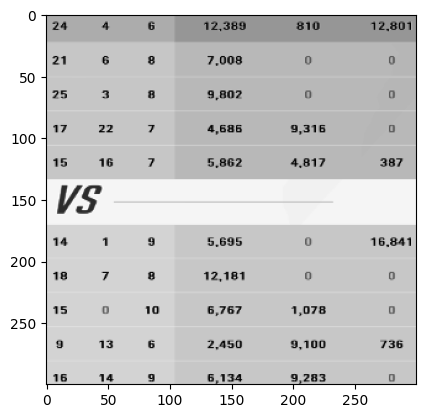

In [3]:
imshow(list_png[-1], 'Greys')
show()

In [38]:
from pandas import read_csv
import pandas as pd

index_col = 0
usecols = 0, 2, 3, 4, 5, 6, 7
dict_ = {'index_col': index_col, 'usecols': usecols}
frame_defeat = read_csv('datasets/role_defeat.csv', **dict_)
frame_draw = read_csv('datasets/role_draw.csv', **dict_)
frame_victory = read_csv('datasets/role_victory.csv', **dict_)
frame_concat = pd.concat((frame_defeat, frame_draw, frame_victory), keys=['defeat', 'draw', 'victory'])
frame_concat.iloc[:20]

E   A   D    DMG      H   MIT
       INDEX                                
defeat 1       0   0   8   2947   1425  4611
       1       1   0   3   1818      0   650
       1       2   0   7   4735    487   308
       1       1   0   3   2078   2748     0
       1       1   1   3    269   5848   189
       1      17   4   0   4381      0  7181
       1      17   0   1   5906      0  1044
       1      12   0   1   5907      0     0
       1       8   6   0   2790   4794     0
       1      10  13   0   2226   5556   208
       2      23   9  10  10899    163  5789
       2      22   3   4   7938      0   340
       2      21   2  11  11522   1304   231
       2       0  28  10     60  11726     0
       2      17  14   7   3894   9805   666
       2      26  12   8   9395      0  6943
       2      32   3   6  10120    248  1281
       2      24   1   7   8344      0     0
       2      13  14   7   3694   8473   316
       2      18  20   7   5677  11922   469

In [36]:
ndarray_concat = frame_concat.values

numpy.ndarray

In [32]:
from tensorflow.strings import split, to_number
from tensorflow.compat import as_str
from tensorflow import int32

str_path = 'datasets/victory_122.png'
tensor_split = split(split(str_path, '/')[-1], '_')
frame_concat.loc[as_str(tensor_split[0].numpy()), to_number(split(tensor_split[-1], '.')[0], int32).numpy()].values.reshape(60)

array([   26,     2,     8, 14800,  5388,  4351,    24,     0,     9,
       11956,     0,   556,    19,     3,    11,  7131,     0,   826,
          13,    21,     5,  4697, 12149,   385,    29,    21,     8,
       11112, 11465,     0,    19,     4,     8, 11908,   505,  6656,
          21,     1,     8,  9786,     0,    51,    20,     5,    11,
       13060,     0,     0,    21,    17,     6, 10272, 15807,     0,
          14,    16,    12,  4702, 11242,  1129])

In [1]:
from pandas import read_csv
import pandas as pd

usecols = range(1, 7)
frame_defeat = read_csv('datasets/role_defeat.csv', usecols=usecols)
frame_draw = read_csv('datasets/role_draw.csv', usecols=usecols)
frame_victory = read_csv('datasets/role_victory.csv', usecols=usecols)
frame_concat = pd.concat([frame_defeat, frame_draw, frame_victory], ignore_index=True)
int_frame = frame_concat.shape[0] // 10
frame_concat.index = tuple((i, j) for i in range(int_frame) for j in range(10))
frame_concat

E   A   D    DMG      H    MIT
0   0   0   0   8   2947   1425   4611
    1   1   0   3   1818      0    650
    2   2   0   7   4735    487    308
    3   1   0   3   2078   2748      0
    4   1   1   3    269   5848    189
...    ..  ..  ..    ...    ...    ...
892 5  23   4  11  17510      0  18395
    6  22   0  11  14506    954   2181
    7   8   0  18   9756   1827    714
    8  11   7  12   8385  12803    300
    9  12  14  15   4090  12759     86

[8930 rows x 6 columns]

In [7]:
pd.concat([frame_defeat, frame_draw, frame_victory], keys=['defeat', 'draw', 'victory'])

E   A   D    DMG      H    MIT
defeat  0      0   0   8   2947   1425   4611
        1      1   0   3   1818      0    650
        2      2   0   7   4735    487    308
        3      1   0   3   2078   2748      0
        4      1   1   3    269   5848    189
...           ..  ..  ..    ...    ...    ...
victory 4555  23   4  11  17510      0  18395
        4556  22   0  11  14506    954   2181
        4557   8   0  18   9756   1827    714
        4558  11   7  12   8385  12803    300
        4559  12  14  15   4090  12759     86

[8930 rows x 6 columns]

In [2]:
y_train_full = frame_concat.values.reshape(-1, 60)
y_train_full.shape

(893, 60)

In [3]:
int_split = -int(int_frame * .02)
y_train, y_valid = y_train_full[:int_split], y_train_full[int_split:]
y_train.shape, y_valid.shape

((876, 60), (17, 60))

In [4]:
from tensorflow.keras.backend import clear_session

clear_session()

2025-09-10 06:32:41.862501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757485962.032042      28 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757485962.085587      28 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757485962.546317      28 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757485962.546349      28 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757485962.546351      28 computation_placer.cc:177] computation placer alr

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False).fit(ndarray_frame)
ndarray_encoder = encoder.categories_[0]
ndarray_encoder

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
ndarray_transform = encoder.transform(ndarray_frame).reshape(int_frame, -1, ndarray_encoder.size)
ndarray_transform.shape

(893, 210, 10)

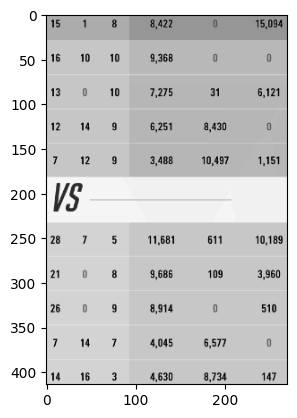

In [8]:
tensor_read = read_file('datasets/role_defeat/defeat_427.png')
tensor_decode = decode_png(tensor_read, 1)
int_offset_height, int_offset_width, int_target_height, int_target_width = 230, 920, 690, 450
tensor_crop = crop_to_bounding_box(tensor_decode, int_offset_height, int_offset_width, int_target_height, int_target_width)
float_scale = .6
tuple_size = int(int_target_height * float_scale), int(int_target_width * float_scale)
tensor_resize = resize(tensor_crop, tuple_size)
imshow(tensor_resize, 'Greys')
show()

In [9]:
from tensorflow import constant
import tensorflow as tf

tensor_defeat = constant([f'datasets/role_defeat/defeat_{i:03d}.png' for i in range(1, frame_defeat.shape[0] // 10 + 1)])
tensor_draw = constant([f'datasets/role_draw/draw_{i:03d}.png' for i in range(1, frame_draw.shape[0] // 10 + 1)])
tensor_victory = constant([f'datasets/role_victory/victory_{i:03d}.png' for i in range(1, frame_victory.shape[0] // 10 + 1)])
tensor_concat = tf.concat((tensor_defeat, tensor_draw, tensor_victory), 0)
tensor_concat

<tf.Tensor: shape=(893,), dtype=string, numpy=
array([b'datasets/role_defeat/defeat_001.png',
       b'datasets/role_defeat/defeat_002.png',
       b'datasets/role_defeat/defeat_003.png',
       b'datasets/role_defeat/defeat_004.png',
       b'datasets/role_defeat/defeat_005.png',
       b'datasets/role_defeat/defeat_006.png',
       b'datasets/role_defeat/defeat_007.png',
       b'datasets/role_defeat/defeat_008.png',
       b'datasets/role_defeat/defeat_009.png',
       b'datasets/role_defeat/defeat_010.png',
       b'datasets/role_defeat/defeat_011.png',
       b'datasets/role_defeat/defeat_012.png',
       b'datasets/role_defeat/defeat_013.png',
       b'datasets/role_defeat/defeat_014.png',
       b'datasets/role_defeat/defeat_015.png',
       b'datasets/role_defeat/defeat_016.png',
       b'datasets/role_defeat/defeat_017.png',
       b'datasets/role_defeat/defeat_018.png',
       b'datasets/role_defeat/defeat_019.png',
       b'datasets/role_defeat/defeat_020.png',
       b'data

In [324]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input((1080, 1920, 1)))
model.add(tf.keras.layers.Cropping2D(((230, 160), (920, 550))))
model.add(tf.keras.layers.Resizing(345, 225))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2100, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cropping2d (Cropping2D)         │ (None, 690, 450, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 345, 225, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 77625)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │    23,287,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2100)           │       212,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,530,000 (89.76 MB)

 Trainable params: 23,530,000 (89.76 MB)

 Non-trainable params: 0 (0.00 B)

In [329]:
model.compile('sgd', 'categorical_crossentropy', metrics=['accuracy'])

In [326]:
pngs = []
for path in role_png:
    raw = tf.io.read_file(path)
    image = tf.image.decode_png(raw, 1)
    pngs.append(image)
X_train_full = tf.convert_to_tensor(pngs)

In [327]:
X_valid, X_train = X_train_full[:10], X_train_full[10:]
y_valid, y_train = role_transform_reshape[:10], role_transform_reshape[10:]

In [330]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


I0000 00:00:1756981542.775634    2567 service.cc:152] XLA service 0x7164780032d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756981542.776680    2567 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2025-09-04 10:25:42.916730: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756981543.123040    2567 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-09-04 10:25:44.058372: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186_0', 120 bytes spill stores, 120 bytes spill loads

2025-09-04 10:25:44.109317: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot

 8/28 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0523 - loss: nan

I0000 00:00:1756981548.896905    2567 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1064 - loss: nan

2025-09-04 10:25:50.147939: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186_0', 120 bytes spill stores, 120 bytes spill loads

2025-09-04 10:25:50.166747: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 200 bytes spill stores, 200 bytes spill loads

2025-09-04 10:25:50.398612: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 540 bytes spill stores, 540 bytes spill loads

2025-09-04 10:25:50.414674: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 64 bytes spill stores, 64 bytes spill loads

2025-09-04 10:25:50.740288: I extern

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.1091 - loss: nan

2025-09-04 10:25:55.897089: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 112 bytes spill stores, 112 bytes spill loads

2025-09-04 10:25:56.275782: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_184', 820 bytes spill stores, 864 bytes spill loads



28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 312ms/step - accuracy: 0.1098 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1468 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1646 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1680 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1627 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1414 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1470 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1473 - loss: nan - val_accuracy: 0.3000 - val_loss: nan
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 